Decision Tree Accuracy: 1.0
Feature Importances: [0.01667014 0.         0.40593501 0.57739485]
Entropy Decision Tree Accuracy: 1.0
Decision Tree Regressor MSE: 0.49496399449035855


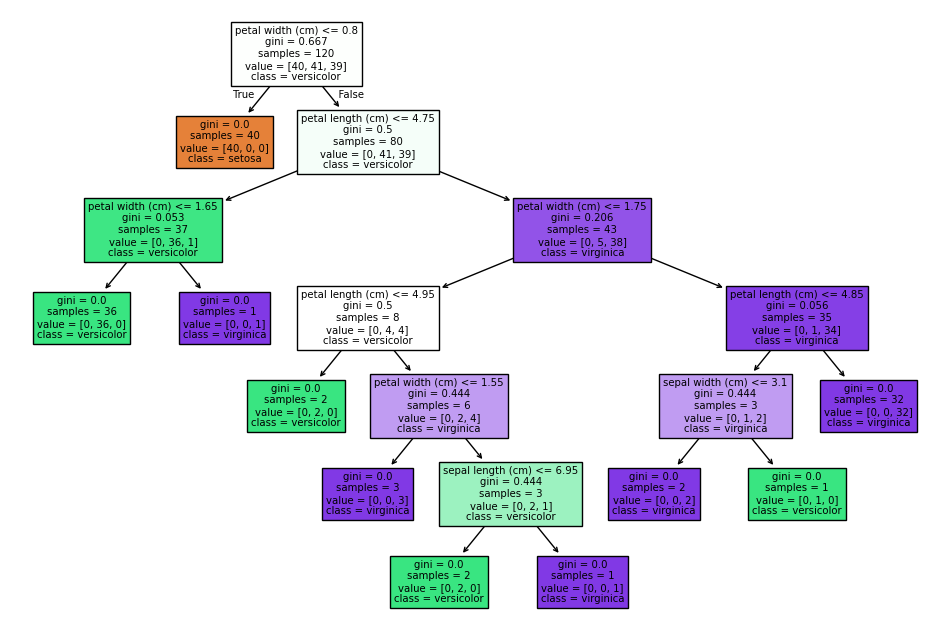

Max Depth 3 Accuracy: 1.0
Default Tree Accuracy: 1.0
Scaled Data Accuracy: 1.0
OvR Strategy Accuracy: 1.0
Feature Importance Scores: [0.01667014 0.01667014 0.38926487 0.57739485]
MSE (max_depth=5): 0.5245146178314736


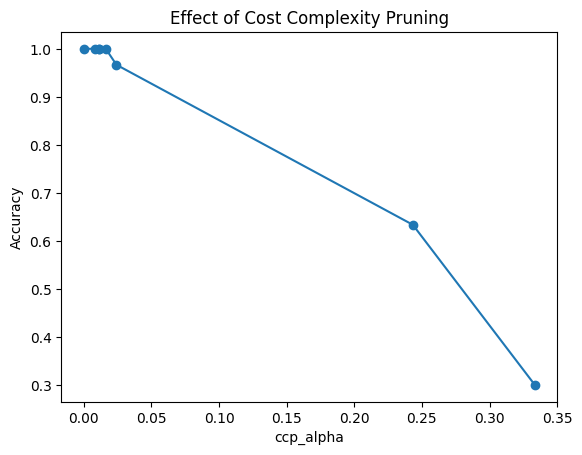

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



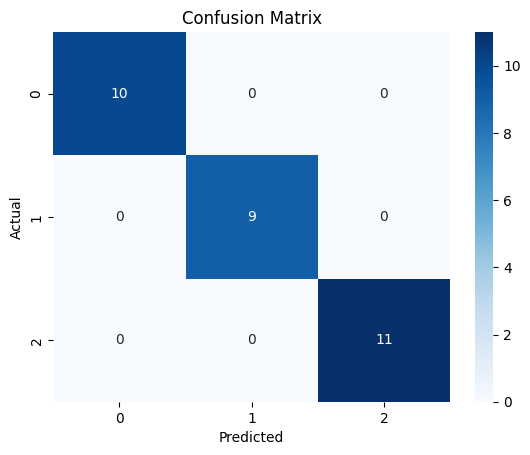

Best Parameters: {'max_depth': 10, 'min_samples_split': 2}


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix

# Load datasets
iris = load_iris()
housing = fetch_california_housing()

# Split data
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
Xh_train, Xh_test, yh_train, yh_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)

# 16. Train a Decision Tree Classifier on the Iris dataset and print accuracy
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

# 17. Train Decision Tree using Gini Impurity and print feature importances
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)
print("Feature Importances:", clf_gini.feature_importances_)

# 18. Train Decision Tree using Entropy and print accuracy
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
print("Entropy Decision Tree Accuracy:", accuracy_score(y_test, y_pred_entropy))

# 19. Train Decision Tree Regressor and evaluate using MSE
reg = DecisionTreeRegressor()
reg.fit(Xh_train, yh_train)
yh_pred = reg.predict(Xh_test)
print("Decision Tree Regressor MSE:", mean_squared_error(yh_test, yh_pred))

# 20. Visualize Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

# 21. Train Decision Tree with max_depth=3 and compare accuracy with a fully grown tree
clf_depth3 = DecisionTreeClassifier(max_depth=3)
clf_depth3.fit(X_train, y_train)
y_pred_depth3 = clf_depth3.predict(X_test)
print("Max Depth 3 Accuracy:", accuracy_score(y_test, y_pred_depth3))

# 22. Train Decision Tree with and without max_depth limitation
clf_unrestricted = DecisionTreeClassifier()
clf_unrestricted.fit(X_train, y_train)
print("Default Tree Accuracy:", accuracy_score(y_test, clf_unrestricted.predict(X_test)))

# 23. Apply feature scaling before training Decision Tree Classifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_scaled = DecisionTreeClassifier()
clf_scaled.fit(X_train_scaled, y_train)
print("Scaled Data Accuracy:", accuracy_score(y_test, clf_scaled.predict(X_test_scaled)))

# 24. Train Decision Tree Classifier using One-vs-Rest (OvR) strategy
clf_ovr = DecisionTreeClassifier()
clf_ovr.fit(X_train, y_train)
print("OvR Strategy Accuracy:", accuracy_score(y_test, clf_ovr.predict(X_test)))

# 25. Display feature importance scores
print("Feature Importance Scores:", clf.feature_importances_)

# 26. Train Decision Tree Regressor with max_depth=5 and compare performance
reg_depth5 = DecisionTreeRegressor(max_depth=5)
reg_depth5.fit(Xh_train, yh_train)
yh_pred_depth5 = reg_depth5.predict(Xh_test)
print("MSE (max_depth=5):", mean_squared_error(yh_test, yh_pred_depth5))

# 27. Apply Cost Complexity Pruning and visualize effect on accuracy
path = clf.cost_complexity_pruning_path(X_train, y_train)
cps = path.ccp_alphas
pruned_clfs = [DecisionTreeClassifier(ccp_alpha=alpha).fit(X_train, y_train) for alpha in cps]
pruned_accuracies = [accuracy_score(y_test, clf.predict(X_test)) for clf in pruned_clfs]
plt.plot(cps, pruned_accuracies, marker='o')
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Effect of Cost Complexity Pruning")
plt.show()

# 28. Evaluate performance using Precision, Recall, and F1-Score
print(classification_report(y_test, y_pred))

# 29. Visualize Confusion Matrix using seaborn
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 30. Use GridSearchCV to find optimal max_depth and min_samples_split
param_grid = {"max_depth": [3, 5, 10, None], "min_samples_split": [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
